# David Ferreras Díaz y Sergio Vázquez Carbajo


# Secrets of Vinho Verde

This week we will use the power of the **scikit-learn** library to establish which **factors** contribute to a great glass of red wine.

1599 wines were tested by at least 3 wine experts and given a quality grade from **0** (terrible) to **10** (excellent).

There were **11 factors** measured: *fixed acidity*, *volatile acidity*, *citric acid*, *residual sugar*, *chlorides*, *free and total sulphur dioxide*, *density*, *pH*, *sulphates* and *alcohol*.

David Ferreras Díaz y Sergio Vázquez Carbajo

In [1]:
import pandas as pd
# Load in the red wine data from the UCI ML website.
df_redwine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [2]:
# Take a look
print(df_redwine.head(10))
# Data dimensionality (rows, colums)
print(df_redwine.shape)
# Data distributing
df_redwine.info()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

## Task

In this task, you have to:
1. Split the set in training and testing sets (80-20).
2. Apply the following classification methods:
  * Gaussian Naive Bayes (NB)
  * Decision Tree (DT)
  * K-Nearest Neighbors (KNN)
    * n_neighbors = {3, 5},
    * weights = {'uniform', 'distance'}
  * Random Forest (RF)
    * n_estimators = 100

3. Evaluate the quality of each model by computing:
  * Confusion matrix
  * ROC
  * Cross-validation score

**Question:**
Which model/configuration performs better predictions?


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import label_binarize

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3795 - loss: 1.5734 - val_accuracy: 0.5625 - val_loss: 1.2335
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5203 - loss: 1.1507 - val_accuracy: 0.5469 - val_loss: 1.1584
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5915 - loss: 1.0142 - val_accuracy: 0.5781 - val_loss: 1.1198
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5880 - loss: 0.9965 - val_accuracy: 0.5430 - val_loss: 1.1231
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6149 - loss: 0.9820 - val_accuracy: 0.5273 - val_loss: 1.1196
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6063 - loss: 0.9636 - val_accuracy: 0.5820 - val_loss: 1.1141
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6372 - loss: 0.9140 - val_accuracy: 0.5547 - val_loss: 1.0972
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5860 - loss: 0.9652 - val_accuracy: 0.5430 - val_loss: 1.

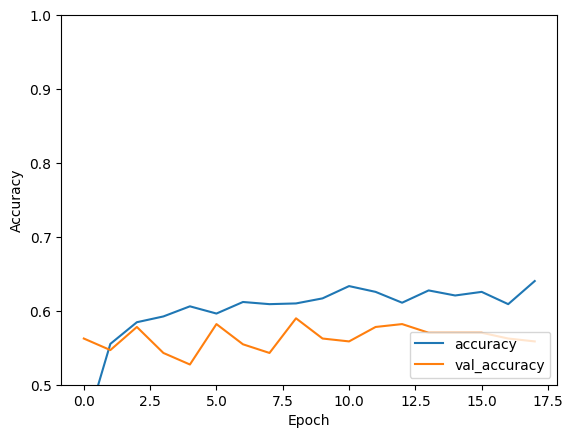

In [16]:
X = df_redwine.drop('quality', axis=1)
y = df_redwine['quality'].values - 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir red neuronal, clases de 0-5
def create_model():
  model = Sequential([
      Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
      Dropout(0.3),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(32, activation='relu'),
      Dense(6, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

# Entrenamiento del modelo
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = create_model()
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32, callbacks=[early_stop], verbose=1)
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

accuracyRn=accuracy_score(y_test,y_pred)
print("Método de Redes neuronales: "+str(accuracyRn))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')




Precisión en test: 0.6125
Evaluación del método Redes Neuronales con Confusion Matrix: 
[[  0   0   1   1   0   0]
 [  0   0  11   0   0   0]
 [  0   0 106  30   0   0]
 [  0   0  50  74   4   0]
 [  0   0   1  23  16   0]
 [  0   0   0   2   1   0]]

ROC AUC Score: 0.9037


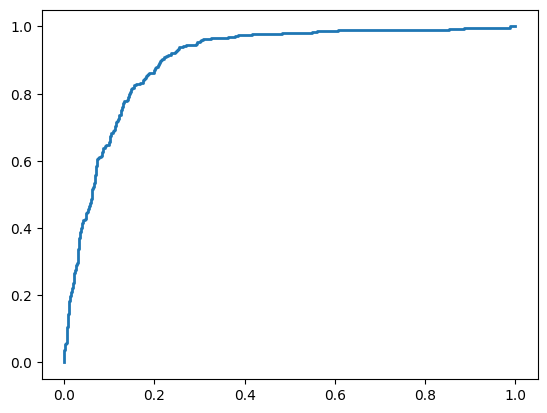

In [19]:
# Evaluacion del modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'\nPrecisión en test: {test_acc:.4f}')

# Matriz de confusion
cmRN = confusion_matrix(y_test,y_pred)
print("Evaluación del método Redes Neuronales con Confusion Matrix: ")
print(cmRN)

# ROC
y_binarized_variable=label_binarize(y_test,classes=list(set(y_train)))
fprRn, tprRn,_=roc_curve(y_binarized_variable.ravel(),y_prob.ravel())
auc_Rn=auc(fprRn,tprRn)
plt.plot(fprRn,tprRn,label=f"Red Neuronal (AUC = {auc_Rn:.2f})", lw=2)
print(f"\nROC AUC Score: {auc_Rn:.4f}")

